# Первичная аггрегация данных

## 1. Фильтрация данных

### 1.1 Первичную фильтрацию данных:
Удаление следующих поездок:
    1. нулевой длительностью.
    2. нулевым количеством пассажиров.
    3. нулевым расстоянием поездки по счётчикую.
    4. координатами начала, не попадающими в прямоугольник Нью-Йорка.
написал на С++
https://github.com/nikita-chizh/TaxiTask/blob/master/TaxiCpp/filter.cpp

### 1.2 Поиск зоны и часа каждой поездки тоже написал на C++:
https://github.com/nikita-chizh/TaxiTask/blob/master/TaxiCpp/hoursZones.cpp

In [8]:
# Результат
import numpy as np
import pandas as pd
import os
dpath = "/Users/nikita/PycharmProjects/TaxiTask/processed_data/AllMonth/m0_all.csv"
time_and_zoneDF = pd.read_csv(dpath)
hmin = time_and_zoneDF[["hours"]].min()
hmax = time_and_zoneDF[["hours"]].max()
time_and_zoneDF.head()

,tripId,hours,zones
0,0,24,1230
1,1,24,1177
2,2,24,1230
3,3,24,1386
4,4,24,1178


# 2. Построение 2мерной статистики

In [9]:
zones = np.arange(1, 2501, 1)
print(hmin)
print(hmax)
hours = np.arange(int(hmin), int(hmax+1), 1)

hours    24
dtype: int64
hours    767
dtype: int64


In [10]:
twoD = pd.DataFrame(np.zeros((2500, hours.size)), index=zones, columns=[str(x) for x in hours], dtype=int)
f = open(dpath)
l = f.readline()
for l in f:
    row = l.split(",")
    h = int(row[1]) - hours[0]
    z = int(row[2])
    twoD.values[z][h]+=1
twoD.to_csv("/Users/nikita/PycharmProjects/TaxiTask/processed_data/AllMonth/M5TwoDstat.csv")


Найдем координаты ячейки с Empire State Building

In [11]:
est = (-73.9857, 40.7484)
dpath = "/Users/nikita/PycharmProjects/TaxiTask/data/regions.csv"
f = open(dpath)
l = f.readline()
estZone = -1
for l in f:
    coord = l.split(";")
    w = float(coord[1])
    e = float(coord[2])
    s = float(coord[3])
    n = float(coord[4])
    fcond = w < est[0] < e
    scond = s < est[1] < n
    if fcond and scond:
        assert(estZone == -1)
        estZone = coord[0]
print(estZone)

1231


Построим график поездок из этой ячейки по часам

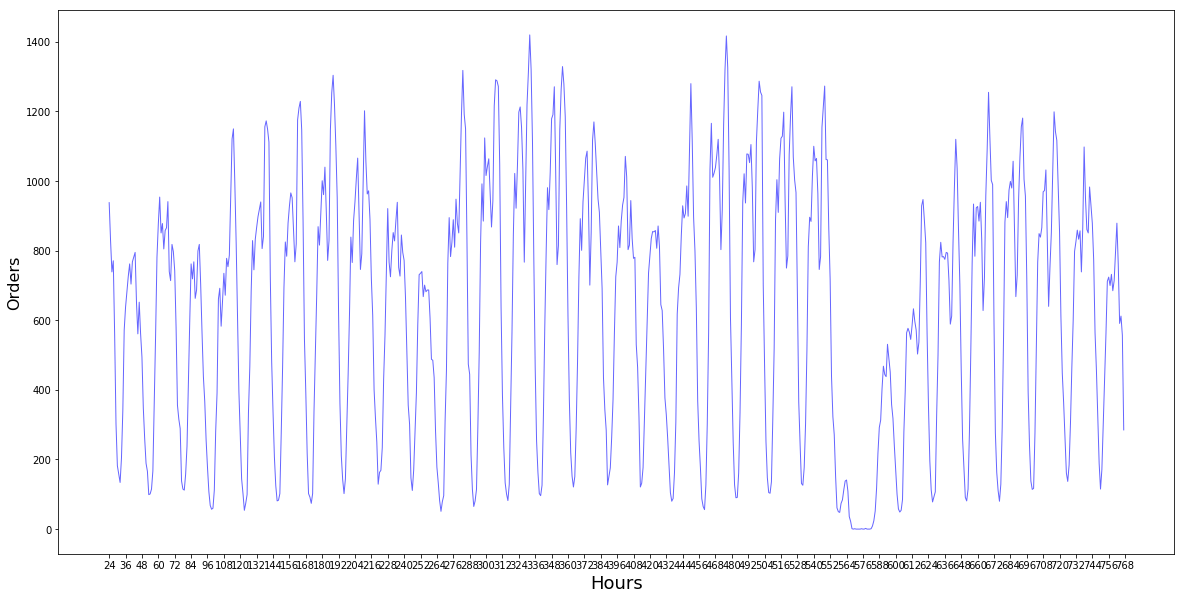

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
x = hours
plt.figure(figsize=(20,10))
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Orders', fontsize=16)
plt.xticks(np.arange(min(x), max(x)+2, 12))
plt.plot(x, twoD.iloc[[estZone]].values[0], 
         'r-', lw=1, alpha=0.6, color='blue')

In [13]:
from collections import Counter
zeros = 0
for index, row in twoD.iterrows():
    c = Counter(row)
    zeros+=c[0]
print("ZERO zone/hours=", zeros)
# 1718238 true

ZERO zone/hours= 1725582
